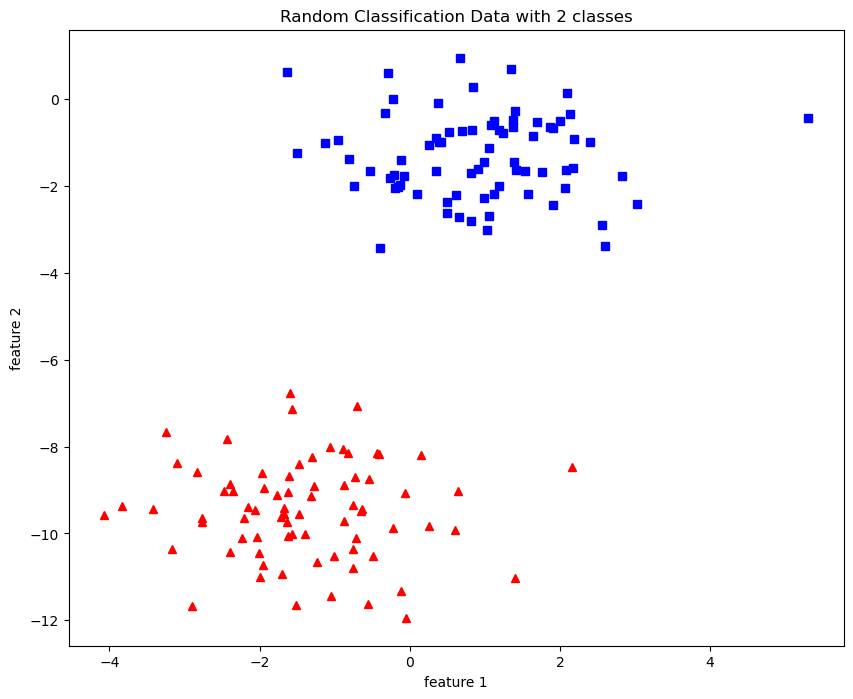

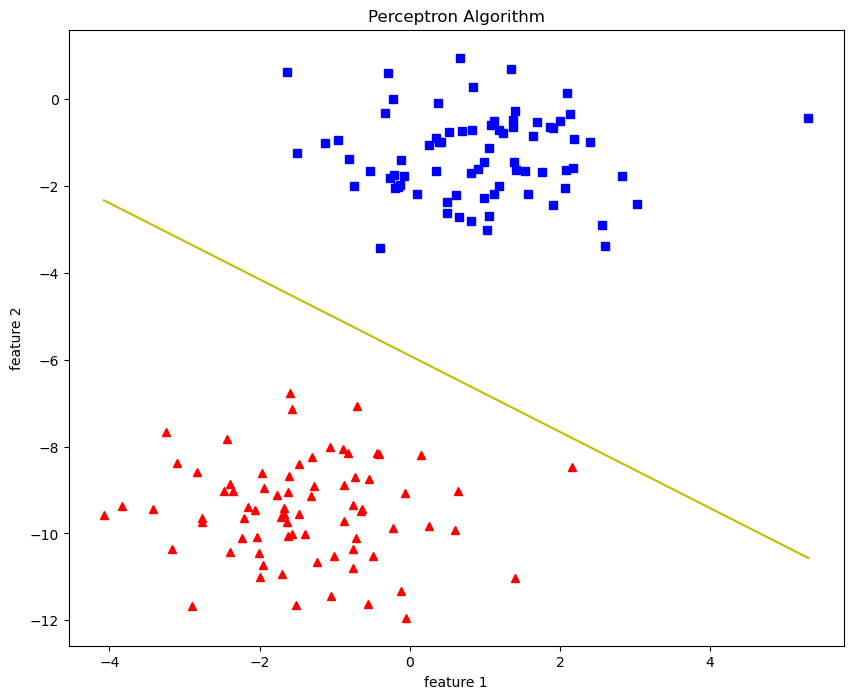

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
X, y = datasets.make_blobs(n_samples=150,n_features=2, centers=2,cluster_std=1.05,
                           random_state=2)

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

def step_func(z):
        return 1.0 if (z > 0) else 0.0

def perceptron(X, y, lr, epochs):
       
    m, n = X.shape
   
    theta = np.zeros((n+1,1))
    
    n_miss_list = []

   
    for epoch in range(epochs):
     
        n_miss = 0
        
        for idx, x_i in enumerate(X):
        
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
    
            y_hat = step_func(np.dot(x_i.T, theta))
         
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
            
                n_miss += 1
       
        n_miss_list.append(n_miss)
    return theta, n_miss_list

def plot_decision_boundary(X, theta):
   
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
   
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')

theta, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)